In [407]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', '{:.5f}'.format)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import waterfall_chart # !pip install waterfallcharts


In [57]:
master_sales_by_week = pd.read_parquet('./datasets/master_sales_by_week_curated.parquet')

In [46]:
master_sales_by_week['product_id'].nunique()

62699

In [47]:
# get product_ids without any sale
total_sales_by_product_id = master_sales_by_week.groupby(['product_id'], as_index=False).agg({'quantity':'sum', })
products_without_sales = total_sales_by_product_id[total_sales_by_product_id['quantity'] == 0]
product_ids_without_sales = products_without_sales['product_id'].unique()
print(f'Total products_ids without sales: {len(product_ids_without_sales)}')
master_sales_by_week = master_sales_by_week[~(master_sales_by_week['product_id'].isin(product_ids_without_sales))]

Total products_ids without sales: 266


In [49]:
master_sales_by_week_2023 = master_sales_by_week[master_sales_by_week['date'] <= '2023-12-31']

In [435]:
master_sales_by_week_2023.head(1)

,combination,date,cod_fami,quantity,store_id,price_taxes_excluded,product_id,description_fami,description,event,discount,year
0,201AA3,2018-01-08,201,1,1010100,7554.62000,229254.1001.EST,ACCESORIOS BEBE,PEZONERA GBC5103 EN SILICONA,NO EVENT,0,2018


#### Unidades vendidas, venta acumulada y porcentajes agregado por combinacion

In [443]:
total_sales_by_product_id = master_sales_by_week_2023.groupby(['combination'], as_index=False).agg({'description':'max','description_fami':'max','quantity':'sum', })
total_sales_by_product_id.sort_values(by = ['quantity'], ascending=False, inplace=True)
total_sales_by_product_id['cum_sum'] = total_sales_by_product_id['quantity'].cumsum()
total_sales_by_product_id['quantity_perc'] = total_sales_by_product_id['quantity']/total_sales_by_product_id['quantity'].sum()
total_sales_by_product_id['cum_sum_perc'] = total_sales_by_product_id['cum_sum']/total_sales_by_product_id['quantity'].sum()
total_sales_by_product_id['quantity'] = total_sales_by_product_id['quantity'].apply(lambda x: int(x))
total_sales_by_product_id['cum_sum'] = total_sales_by_product_id['cum_sum'].apply(lambda x: int(x))

total_sales_by_product_id[total_sales_by_product_id['cum_sum_perc'] <= 0.80]

,combination,description,description_fami,quantity,cum_sum,quantity_perc,cum_sum_perc
567,240AW1OL1,GENERO ZAFIRO PRINT,TELAS ALMACEN SI,1344893,1344893,0.04111,0.04111
607,240BA5OY7,SUPER NOVACRON,TELAS ALMACEN SI,1006952,2351845,0.03078,0.07188
613,240BB8OR4,MINIMAT STRECH,TELAS ALMACEN SI,999616,3351461,0.03055,0.10243
814,242506BS9,VELO SUIZO PLAIN VOILE,TELAS DECORACION ALMACENES SI,971953,4323414,0.02971,0.13214
7421,250348434AF5,VESTIDO MANGA SISA 1009 INC,VESTUARIO EXTERIOR,706843,5030257,0.02160,0.15375
...,...,...,...,...,...,...,...
506,240AP5OD8,CREPE SUCKER GGT 687,TELAS ALMACEN SI,21059,26088905,0.00064,0.79739
7795,251348434AN9081,SHORT 215 DAMA,VESTUARIO INTERIOR,20929,26109834,0.00064,0.79803
643,240BC5OQ7,LAME VENECIA 164,TELAS ALMACEN SI,20921,26130755,0.00064,0.79867
554,240AU8OU1,BAMBOO SPANDEX TEN,TELAS ALMACEN SI,20853,26151608,0.00064,0.79930


#### Ventas totales por Año

In [60]:
master_sales_by_week_2023['year'] = master_sales_by_week_2023['date'].apply(lambda x: x.strftime('%Y'))
sales_by_year = master_sales_by_week_2023.groupby(['year'], as_index=False)['quantity'].sum()
sales_by_year

,year,quantity
0,2018,7059055
1,2019,6672904
2,2020,4650326
3,2021,4660344
4,2022,4996518
5,2023,4678833


#### Unidades vendidas por año ✅

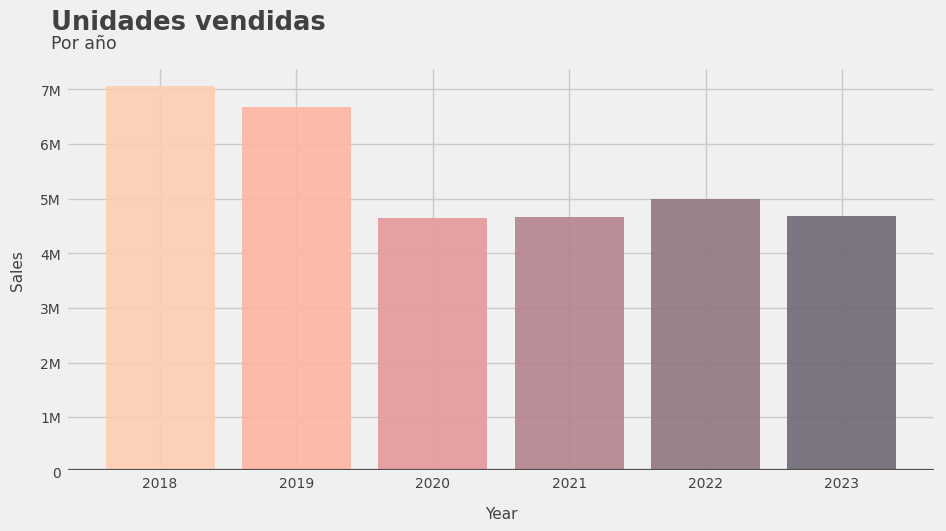

In [532]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,5))

colors = ['#ffcdb2','#ffb4a2','#e5989b','#b5838d','#917681','#6d6875']
plt.bar(x=sales_by_year['year'] , height = sales_by_year['quantity'].to_list(), color=colors, lw=2.2, alpha = 0.9)

# X and y labels
plt.ylabel('', fontsize=10, color='#414141',labelpad=6)
plt.xlabel('', fontsize=10, color='#414141',labelpad=6)

# Horizontal Line
plt.axhline(y=10000, color='#414141', linewidth=3, alpha=1)

# Title & Subtitle
ax.text(x=-0.8, y=8_100_000, s = "Unidades vendidas", fontsize=18.5, fontweight='bold', color='#414141');
plt.text(x=-0.8, y=7_750_000, s = "Por año", fontsize=12.5, color='#414141');

# X and y labels
plt.ylabel('Sales', fontsize=11, color='#414141',labelpad=11)
plt.xlabel('Year', fontsize=11, color='#414141',labelpad=11)
# ticks
plt.yticks( fontsize=10, color='#414141');
plt.xticks( fontsize=10, color='#414141');
# axes
ax.set_yticklabels(labels=['0','1M','2M','3M','4M','5M','6M','7M'], fontsize=10, color='#414141');
#save fig
plt.savefig('./plots/figures/unidades vendidas por año.png', bbox_inches = 'tight', dpi = 150)


#### Variacion precio para top 10 familias vendidas

In [534]:
sales_by_family = master_sales_by_week_2023.groupby(['cod_fami'], as_index=False)['quantity'].sum().sort_values(by = ['quantity'], ascending=False)
sales_by_family['cumsum'] = sales_by_family['quantity'].cumsum()
sales_by_family['perc_cumsum'] = sales_by_family['cumsum'] / sales_by_family['quantity'].sum()
top_sales_90_percent_families = sales_by_family.head(10)['cod_fami'].values
print(top_sales_90_percent_families)
sales_by_family

['240' '242' '243' '250' '239' '219' '251' '248' '244' '202']


,cod_fami,quantity,cumsum,perc_cumsum
14,240,14521280,14521280,0.44383
16,242,3707928,18229208,0.55716
17,243,2359154,20588362,0.62927
23,250,2035764,22624126,0.69149
13,239,1942023,24566149,0.75085
9,219,1802545,26368694,0.80594
24,251,1295167,27663861,0.84552
22,248,1098496,28762357,0.87910
18,244,605407,29367764,0.89760
1,202,543316,29911080,0.91421


In [519]:
def plot_sales_and_price_by_family(df_price ,df_sales, family, title_y = 16_500, subtitle_y = 16_200, y_labels = None, title_x = -1.1,save_fig = True ):
    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize=(10,5))
    ax2 = ax.twinx()

    colors = ['#ffcdb2','#ffb4a2','#e5989b','#b5838d','#917681','#6d6875']
    ax.plot(df_price['year'], df_price['price_taxes_excluded'], color = '#414141', lw=2, alpha = 1, label = 'AVG(price)')
    ax2.bar(x=df_sales['year'] , height = df_sales['quantity'].to_list(), color= colors, lw=2.2, alpha = 1, label = 'SUM(sales)')


    # X and y labels

    ax.set_xlabel('Year', fontsize=10, color='#414141',labelpad=11)
    ax.set_ylabel('AVG(Price)', fontsize=10, color='#414141',labelpad=11)
    ax2.set_ylabel('SUM(Sales)', fontsize=10, color='#414141',labelpad=11)
    ax.legend(bbox_to_anchor=(0.8, 1.15),loc='upper center',fancybox=True, fontsize = 10)
    ax2.legend(bbox_to_anchor=(0.95, 1.15),loc='upper center',fancybox=True, fontsize = 10)


    # ordering zorders
    ax.set_zorder(ax2.get_zorder()+1) # put ax in front of ax2 
    ax.patch.set_visible(False) # hide the 'canvas' 

    # Horizontal Line
    ax2.axhline(y=0, color='#414141', linewidth=5, alpha=1)
    ax.grid(False)

    # Title & Subtitle
    ax.text(x=title_x, y=title_y, s = "Precio Promedio Venta vs Unidades Vendidas", fontsize=16.5, fontweight='bold', color='#414141');
    ax.text(x=title_x, y=subtitle_y, s = f"Familia: {family}", fontsize=11.5, color='#414141');

    # axes
    # ax.set_yticklabels(labels = [int(i) for i in x['price_taxes_excluded'].values], fontsize=10, color='#414141');
    ax.yaxis.set_tick_params(labelsize=10)
    ax.xaxis.set_tick_params(labelsize=10)

    if y_labels:
        ax2.set_yticklabels(labels=y_labels, fontsize=10, color='#414141');
    #save fig
    if save_fig:
        plt.savefig(f'./plots/precio_promedio_vs_ventas/precio_promedio_vs_ventas_{family}.png', bbox_inches = 'tight', dpi = 150)


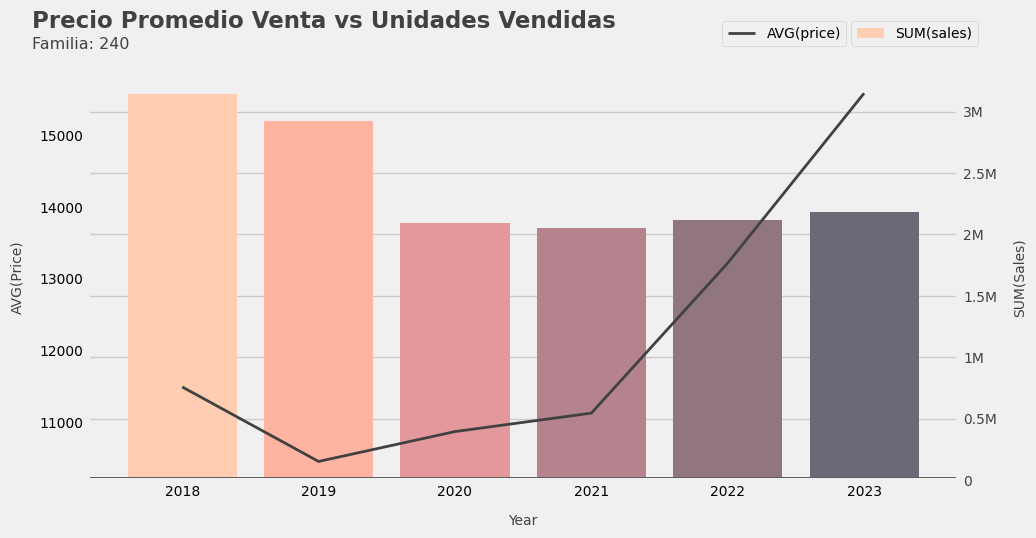

In [520]:
family = top_sales_90_percent_families[0]
df_price = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'] == str(family)].groupby(['year'], as_index=False)['price_taxes_excluded'].mean()
df_sales = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'] == str(family)].groupby(['year'], as_index=False)['quantity'].sum()
params = {'df_price' : df_price,
          'df_sales' : df_sales,
          'family' : str(family),
        #   'title_y' : 3_700_000,
        #   'subtitle_y' : 3_500_000,
          'y_labels' : ['0','0.5M','1M','1.5M','2M','2.5M','3M'],
        #   'title_x' : -3
          }
plot_sales_and_price_by_family(**params)

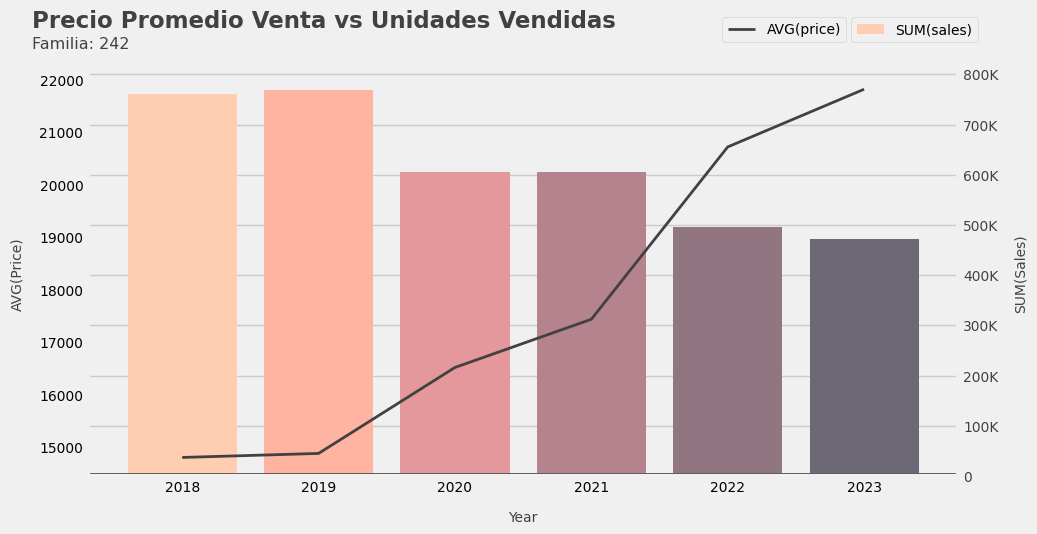

In [521]:
family = top_sales_90_percent_families[1]
df_price = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'] == str(family)].groupby(['year'], as_index=False)['price_taxes_excluded'].mean()
df_sales = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'] == str(family)].groupby(['year'], as_index=False)['quantity'].sum()
params = {'df_price' : df_price,
          'df_sales' : df_sales,
          'family' : str(family),
          'title_y' : 23_000,
          'subtitle_y' : 22_600,
          'y_labels' : ['0','100K','200K','300K','400K','500K','600K','700K','800K'],
        #   'title_x' : -3
          }
plot_sales_and_price_by_family(**params)

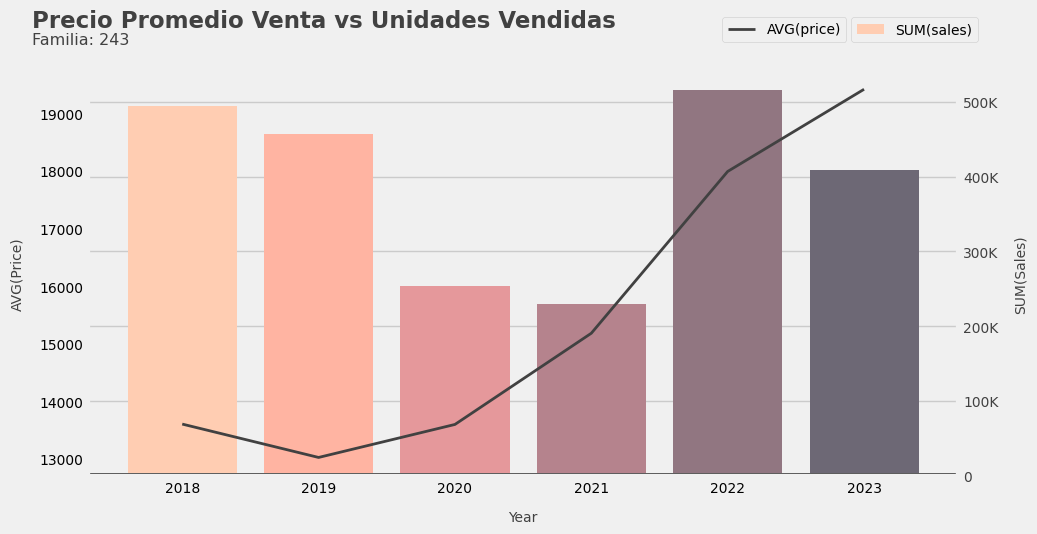

In [522]:
family = top_sales_90_percent_families[2]
df_price = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'] == str(family)].groupby(['year'], as_index=False)['price_taxes_excluded'].mean()
df_sales = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'] == str(family)].groupby(['year'], as_index=False)['quantity'].sum()
params = {'df_price' : df_price,
          'df_sales' : df_sales,
          'family' : str(family),
          'title_y' : 20_500,
          'subtitle_y' : 20_200,
          'y_labels' : ['0','100K','200K','300K','400K','500K'],
        #   'title_x' : -3
          }
plot_sales_and_price_by_family(**params)

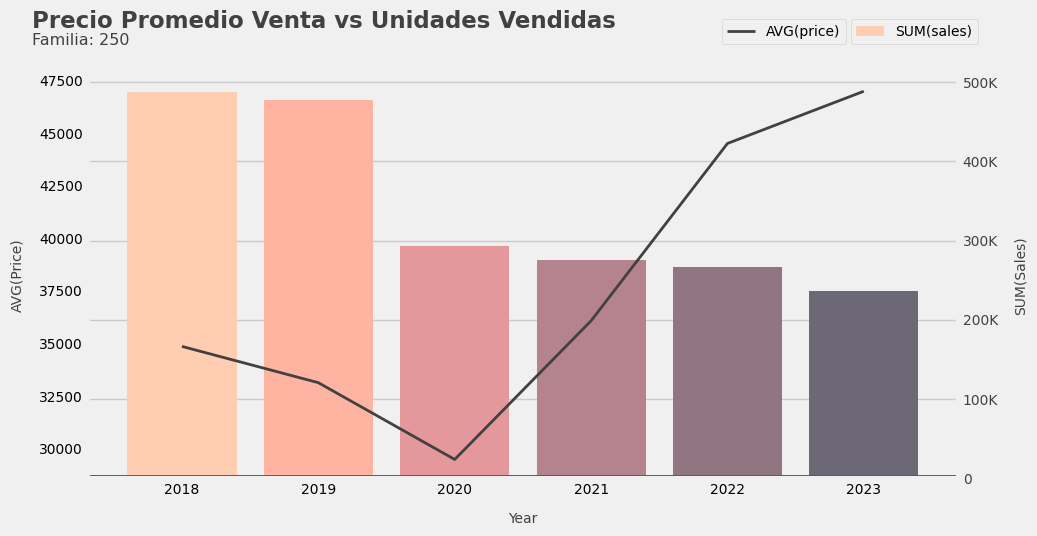

In [523]:
family = top_sales_90_percent_families[3]
df_price = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'] == str(family)].groupby(['year'], as_index=False)['price_taxes_excluded'].mean()
df_sales = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'] == str(family)].groupby(['year'], as_index=False)['quantity'].sum()
params = {'df_price' : df_price,
          'df_sales' : df_sales,
          'family' : str(family),
          'title_y' : 50_000,
          'subtitle_y' : 49_200,
          'y_labels' : ['0','100K','200K','300K','400K','500K'],
        #   'title_x' : -3
          }
plot_sales_and_price_by_family(**params)

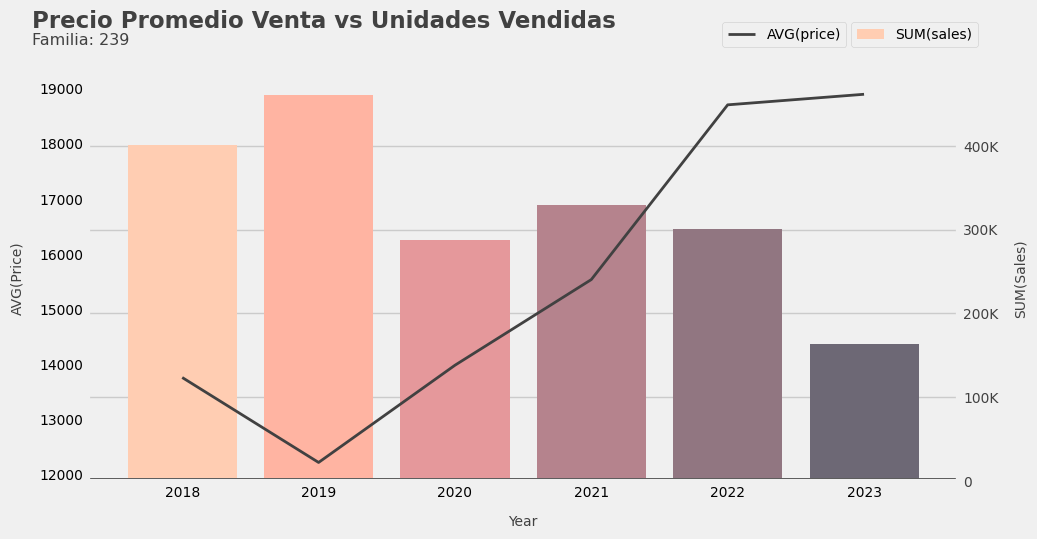

In [524]:
family = top_sales_90_percent_families[4]
df_price = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'] == str(family)].groupby(['year'], as_index=False)['price_taxes_excluded'].mean()
df_sales = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'] == str(family)].groupby(['year'], as_index=False)['quantity'].sum()
params = {'df_price' : df_price,
          'df_sales' : df_sales,
          'family' : str(family),
          'title_y' : 20_100,
          'subtitle_y' : 19_800,
          'y_labels' : ['0','100K','200K','300K','400K'],
        #   'title_x' : -3
          }
plot_sales_and_price_by_family(**params)

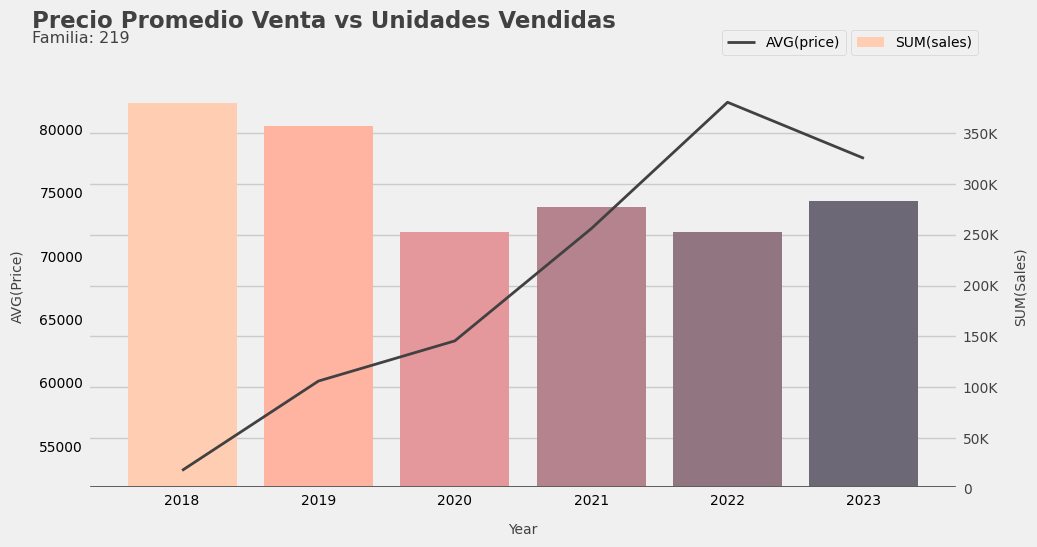

In [525]:
family = top_sales_90_percent_families[5]
df_price = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'] == str(family)].groupby(['year'], as_index=False)['price_taxes_excluded'].mean()
df_sales = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'] == str(family)].groupby(['year'], as_index=False)['quantity'].sum()
params = {'df_price' : df_price,
          'df_sales' : df_sales,
          'family' : str(family),
          'title_y' : 88_000,
          'subtitle_y' : 86_800,
          'y_labels' : ['0','50K','100K','150K','200K','250K','300K','350K'],
        #   'title_x' : -3
          }
plot_sales_and_price_by_family(**params)

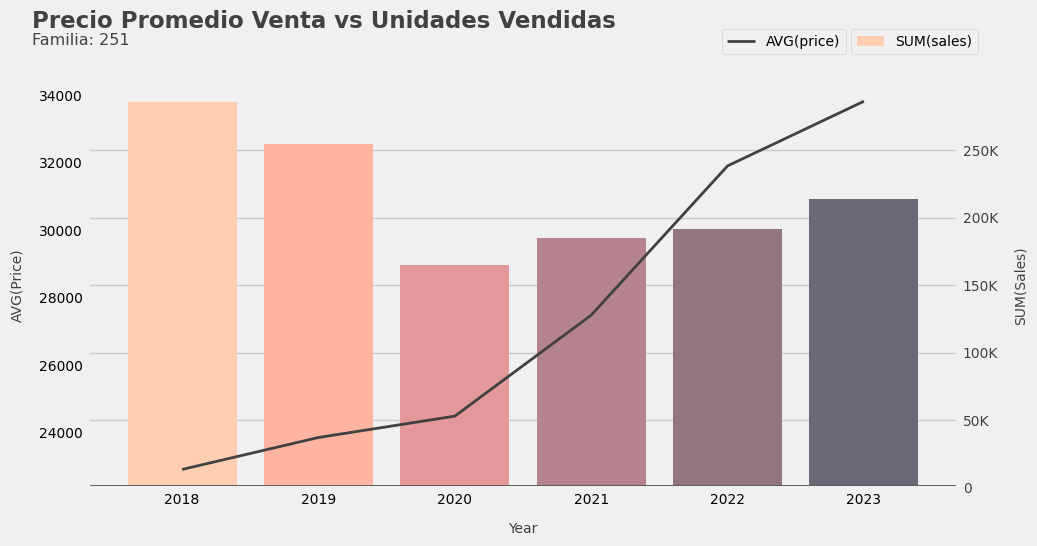

In [526]:
family = top_sales_90_percent_families[6]
df_price = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'] == str(family)].groupby(['year'], as_index=False)['price_taxes_excluded'].mean()
df_sales = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'] == str(family)].groupby(['year'], as_index=False)['quantity'].sum()
params = {'df_price' : df_price,
          'df_sales' : df_sales,
          'family' : str(family),
          'title_y' : 36_000,
          'subtitle_y' : 35_500,
          'y_labels' : ['0','50K','100K','150K','200K','250K'],
        #   'title_x' : -3
          }
plot_sales_and_price_by_family(**params)

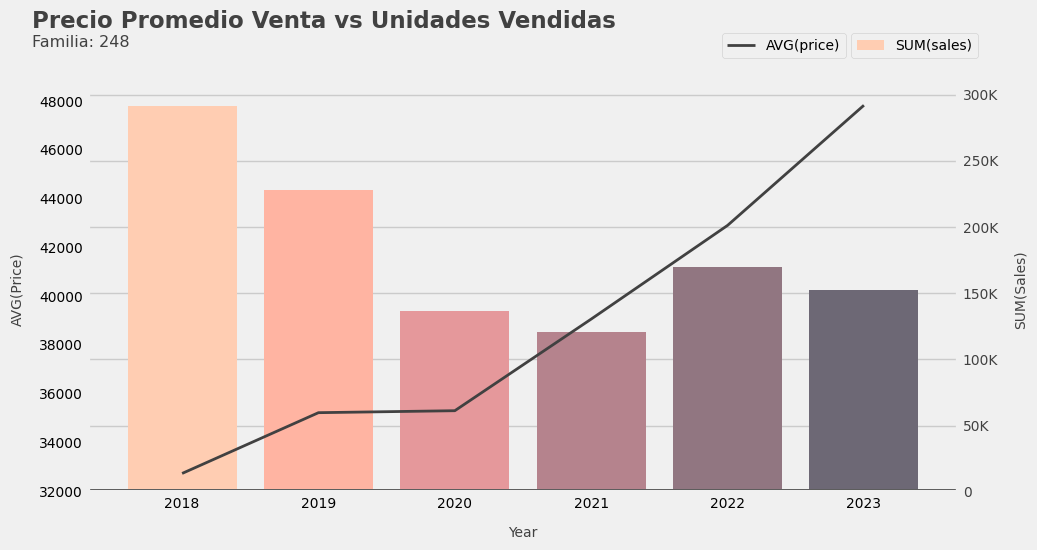

In [527]:
family = top_sales_90_percent_families[7]
df_price = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'] == str(family)].groupby(['year'], as_index=False)['price_taxes_excluded'].mean()
df_sales = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'] == str(family)].groupby(['year'], as_index=False)['quantity'].sum()
params = {'df_price' : df_price,
          'df_sales' : df_sales,
          'family' : str(family),
          'title_y' : 51_000,
          'subtitle_y' : 50_200,
          'y_labels' : ['0','50K','100K','150K','200K','250K','300K'],
        #   'title_x' : -3
          }
plot_sales_and_price_by_family(**params)

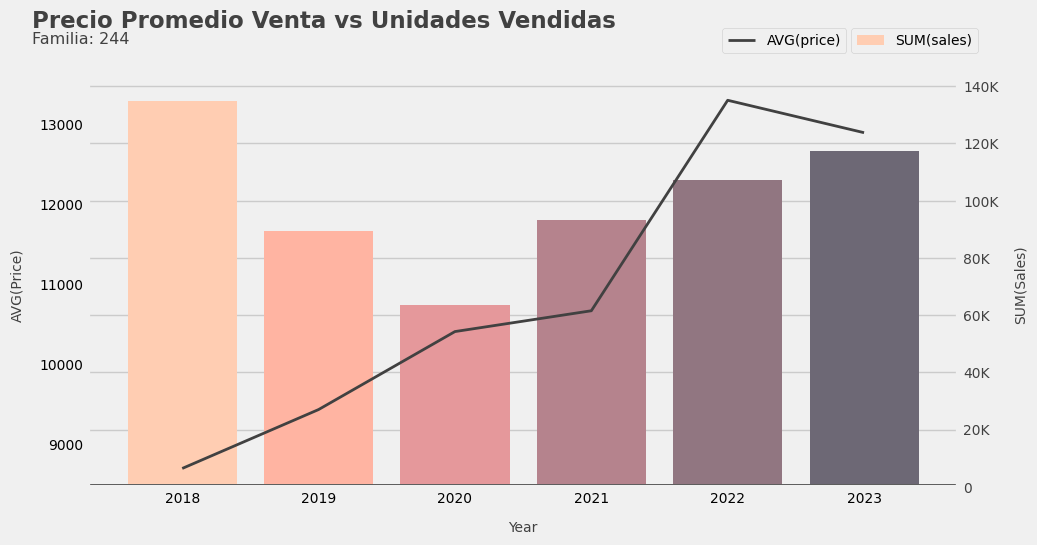

In [528]:
family = top_sales_90_percent_families[8]
df_price = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'] == str(family)].groupby(['year'], as_index=False)['price_taxes_excluded'].mean()
df_sales = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'] == str(family)].groupby(['year'], as_index=False)['quantity'].sum()
params = {'df_price' : df_price,
          'df_sales' : df_sales,
          'family' : str(family),
          'title_y' : 14_200,
          'subtitle_y' : 14_000,
          'y_labels' : ['0','20K','40K','60K','80K','100K','120K','140K'],
        #   'title_x' : -3
          }
plot_sales_and_price_by_family(**params)

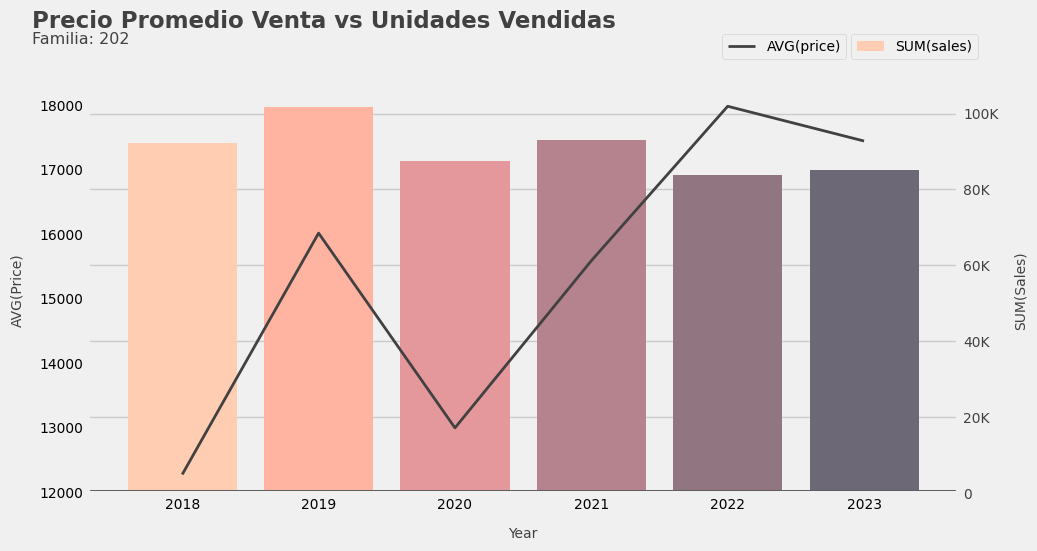

In [529]:
family = top_sales_90_percent_families[9]
df_price = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'] == str(family)].groupby(['year'], as_index=False)['price_taxes_excluded'].mean()
df_sales = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'] == str(family)].groupby(['year'], as_index=False)['quantity'].sum()
params = {'df_price' : df_price,
          'df_sales' : df_sales,
          'family' : str(family),
          'title_y' : 19_200,
          'subtitle_y' : 18_950,
          'y_labels' : ['0','20K','40K','60K','80K','100K',],
        #   'title_x' : -3
          }
plot_sales_and_price_by_family(**params)

#### Pearson Correlation between Price and Sales

In [433]:
master_sales_by_week_2023[['price_taxes_excluded','quantity']]
for year in [2018,2019,2020,2021,2022,2023]:
    master_sales_year = master_sales_by_week_2023[master_sales_by_week_2023['year'] == str(year)]
    pearson_sales_with_price = master_sales_year['price_taxes_excluded'].corr(master_sales_year['quantity'], method='pearson')
    pearson_sales_with_discount = master_sales_year['discount'].corr(master_sales_year['quantity'], method='pearson')
    pearson_sales_with_price , pearson_sales_with_discount = round(pearson_sales_with_price*100, 2), round(pearson_sales_with_discount*100, 2)
    print(f'Año: {year}\n\tCorrelacion Precio -> Venta: {pearson_sales_with_price}% \n\tCorrelacion Descuento -> Venta: {pearson_sales_with_discount}% \n')
    

Año: 2018
	Correlacion Precio -> Venta: -6.83% 
	Correlacion Descuento -> Venta: 13.99% 

Año: 2019
	Correlacion Precio -> Venta: -7.35% 
	Correlacion Descuento -> Venta: 15.41% 

Año: 2020
	Correlacion Precio -> Venta: -6.97% 
	Correlacion Descuento -> Venta: 13.49% 

Año: 2021
	Correlacion Precio -> Venta: -7.73% 
	Correlacion Descuento -> Venta: 15.59% 

Año: 2022
	Correlacion Precio -> Venta: -4.91% 
	Correlacion Descuento -> Venta: 7.41% 

Año: 2023
	Correlacion Precio -> Venta: -9.76% 
	Correlacion Descuento -> Venta: 15.53% 



In [427]:
master_sales_year = master_sales_by_week_2023.copy()
master_sales_year['dummy_event'] = master_sales_year['event'].apply(lambda x: 0 if x == 'NO EVENT' else 1)
pearson_ventas_precio = master_sales_year['price_taxes_excluded'].corr(master_sales_year['quantity'], method='pearson')
pearson_ventas_evento = master_sales_year['dummy_event'].corr(master_sales_year['quantity'], method='pearson')
pearson_ventas_descuento = master_sales_year['discount'].corr(master_sales_year['quantity'], method='pearson')
pearson_ventas_precio , pearson_ventas_evento , pearson_ventas_descuento = round(pearson_ventas_precio*100, 2) , round(pearson_ventas_evento*100, 2) , round(pearson_ventas_descuento*100, 2)
print(f'Historico\n\tCorrelacion Precio -> Venta: {pearson_ventas_precio}% \n\tCorrelacion Evento -> Venta: {pearson_ventas_evento}% \n\tCorrelacion Descuento -> Venta: {pearson_ventas_descuento}% \n')


Historico
	Correlacion Precio -> Venta: -6.91% 
	Correlacion Evento -> Venta: 1.39% 
	Correlacion Descuento -> Venta: 12.5% 



In [454]:
sales_by_year_for_top_families = master_sales_by_week_2023[master_sales_by_week_2023['cod_fami'].isin(top_sales_90_percent_families)]
sales_by_year_for_top_families = sales_by_year_for_top_families.groupby(['year','cod_fami'], as_index=False).agg({'quantity' : 'sum', 'price_taxes_excluded' : 'mean'})
sales_by_year_for_top_families.head()

,year,cod_fami,quantity,price_taxes_excluded
0,2018,202,92288,12269.96305
1,2018,219,379567,53071.13771
2,2018,239,401556,13761.11006
3,2018,240,3143740,11487.31958
4,2018,242,761685,14808.14077


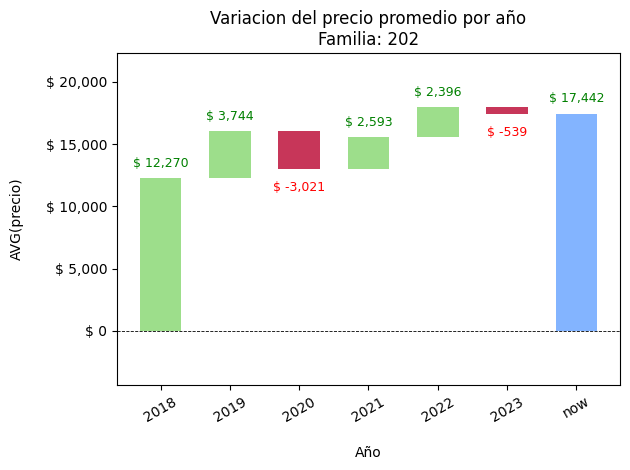

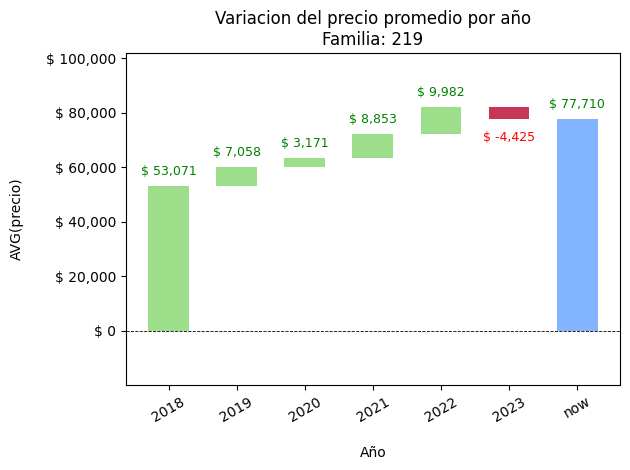

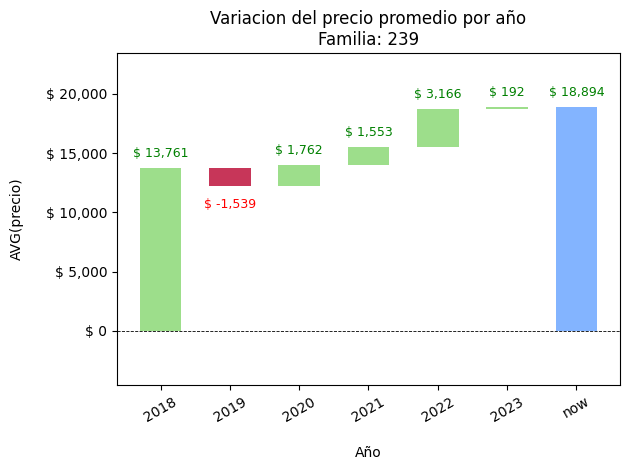

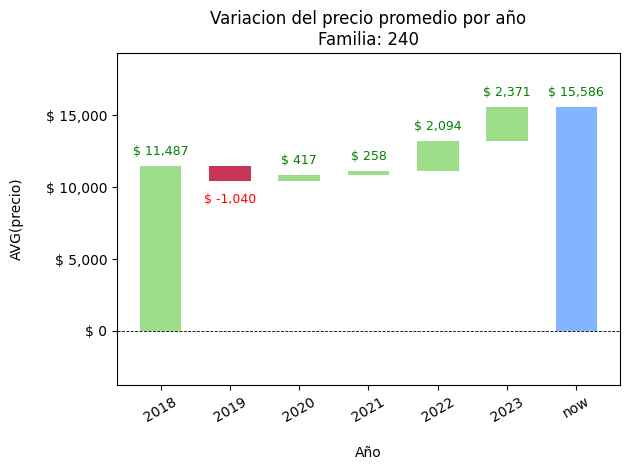

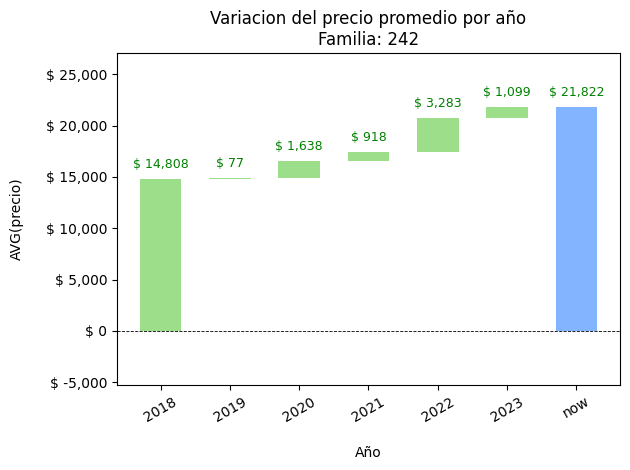

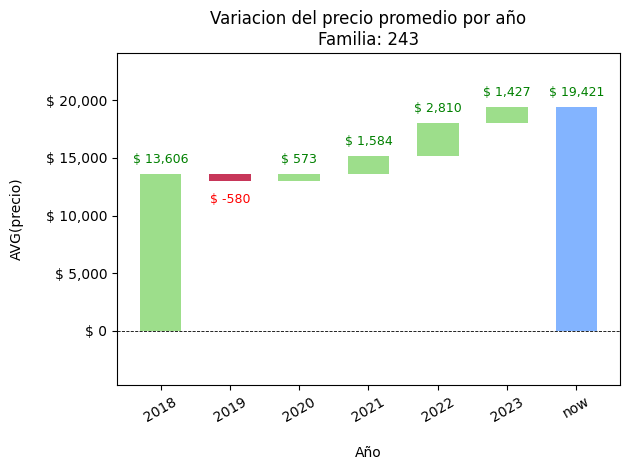

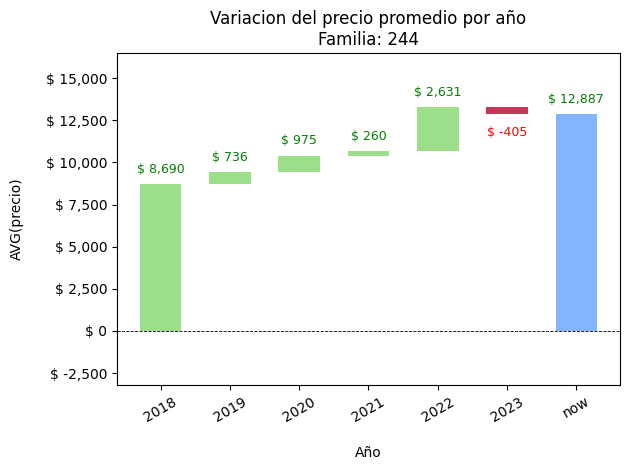

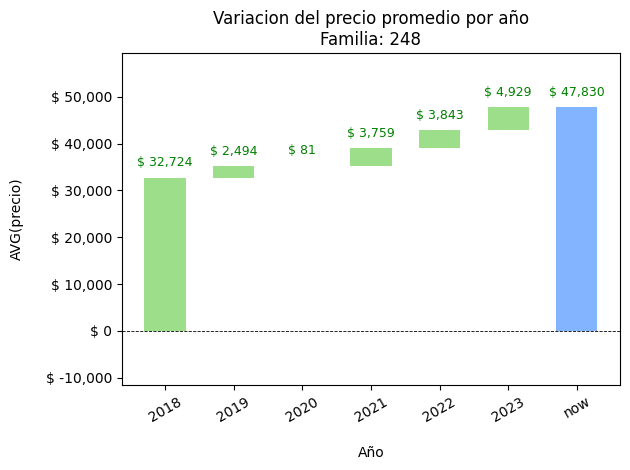

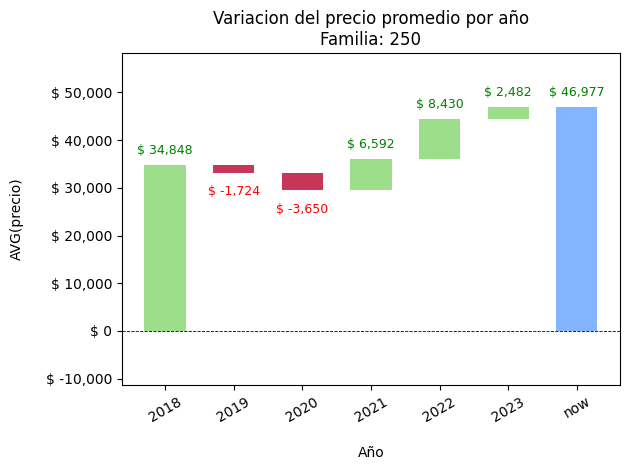

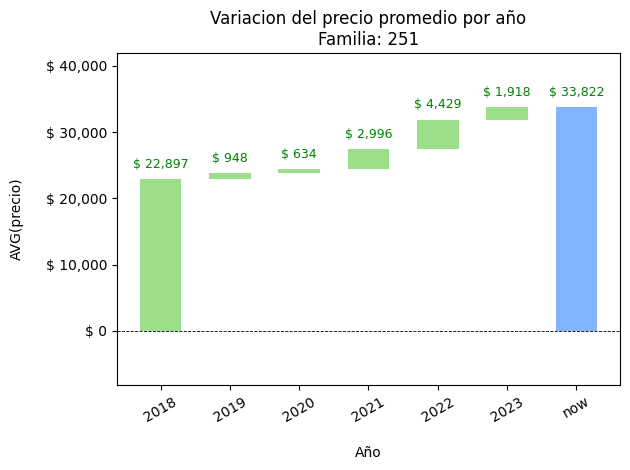

In [530]:
sales_by_year_perc_variation = pd.DataFrame()
for cod_fami in sales_by_year_for_top_families['cod_fami'].unique():
    x = sales_by_year_for_top_families[sales_by_year_for_top_families['cod_fami'] == str(cod_fami)]
    x.sort_values(by = ['year'], inplace=True)
    first_value = x.head(1)['price_taxes_excluded'].iat[0]
    x['price_perc_variation'] = x['price_taxes_excluded'].diff().fillna(first_value)

    # x['sales_perc_variation'] = x['quantity'].pct_change() * 100
    plt.style.use('default')
    # display(x)
    waterfall_chart.plot(x['year'], 
                        x['price_perc_variation'],
                        net_label="now", 
                        x_lab = 'Año',
                        y_lab="AVG(precio)", 
                        Title=f"Variacion del precio promedio por año\nFamilia: {cod_fami}",
                        green_color = '#9DDE8B',
                        red_color = '#C73659',
                        blue_color = '#83B4FF',
                        formatting = "$ {:,.0f}"
                        );
    plt.savefig(f'./plots/variacion_precio_por_familia/variacion_precio_{cod_fami}.png', bbox_inches = 'tight', dpi = 150)


In [ ]:
df_price['variacion_porcentual'] = df_price['price_taxes_excluded'].pct_change() * 100
df_price


In [ ]:
colors = ['#aad576','#73a942','#538d22','#245501','#1a4301','#143601']

# Unidades vendidas por familia por año ❌
# Diferentes llaves vendidas por año (nunique) 
# Evolucion AVG(Precio) venta por familia ✅
# Variacion precio para top 10 combinaciones vendidas
# Variacion precio para top 10 familias vendidas ✅